In [43]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorly as tl
import tltorch 
import scipy as sp
from adaptnn.visual_neuron_convnets import PopulationFullFieldNet, SpatioTemporalTuckerRFConv3D, penalize_convnet_weights
torch.set_default_device('cuda:0')


In [2]:
# rank: (out_c, in_c, space, time)
rank = (4,1,4,4)
kernel_size = (15,15,40)
in_channels = 1;
out_channels = 8

ll = SpatioTemporalTuckerRFConv3D(in_channels, out_channels,
                 kernel_size , rank, bias=None)

In [3]:
W = 0;
with torch.no_grad():
    W = ll.weight
    print(W.shape)

torch.Size([8, 1, 15, 15, 40])


In [18]:
torch.nn.Conv3d(4,6,(4,5,6),dilation=(2,2,2),groups=1,bias=False,padding=(2,2,2)).__repr__()

'Conv3d(4, 6, kernel_size=(4, 5, 6), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False)'

In [7]:
xx = 20
yy = xx
tt = 100
N = 2
X = torch.randn((N,in_channels, xx, yy, tt))

with torch.no_grad():
    Y_0 = torch.nn.functional.conv3d(X, W, bias=ll.bias, stride=ll.stride, padding=ll.padding, dilation=ll.dilation, groups=ll.groups).cpu().numpy()
    print(Y_0.shape)

(2, 8, 6, 6, 61)


In [8]:

with torch.no_grad():
    Y_1 = ll(X).cpu().numpy()
    print(Y_1.shape)

(2, 8, 6, 6, 61)


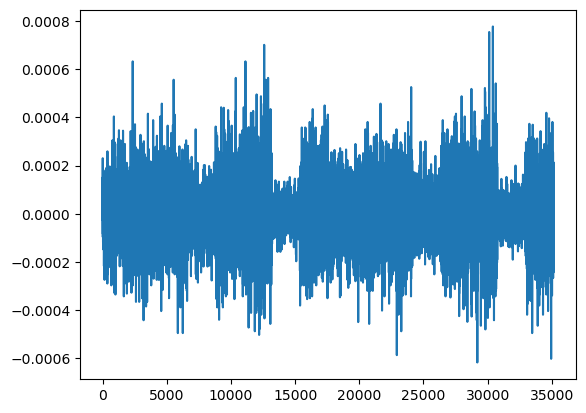

In [11]:
plt.plot(Y_1.ravel() - Y_0.ravel())

In [41]:
xx = 20
yy = xx
in_channels = 3
N = 4
X_0 = torch.randn((N,in_channels, xx, yy))
F = torch.nn.BatchNorm2d(8, track_running_stats=False,affine=False)

with torch.no_grad():
    Y_0 = F(X_0)
    X = X_0.cpu().numpy()
    Y = Y_0.cpu().numpy()

RuntimeError: weight should contain 3 elements not 8

In [38]:
F.num_features


3

In [31]:
Y_2 = np.array(Y)
mu = np.mean(Y_2,axis=(0,2,3),keepdims=True)
sig = np.std(Y_2,axis=(0,2,3),keepdims=True)
Y2 = (Y_2 - mu)/sig
Y2[:3,:3,10,12]

array([[-0.4475767 , -2.1853623 , -0.5242117 ],
       [ 1.2914555 , -0.5572446 ,  0.8165735 ],
       [ 2.793557  ,  0.0658557 ,  0.41886595]], dtype=float32)

In [71]:
contrast = 1


contrast_suffixes = {0 : "", 1 : "b", 2 : "c", 3 : "d"}

base_dir = "/media/latimerk/ExtraDrive1/cbem/Data/JN05/flashesRGC_JN05/"
full_dir = f"{base_dir}/flash2001-04-06{contrast_suffixes[contrast]}"

framelen = 0.00834072 # in s
with open(f"{full_dir}/framelen") as f:
    data = f.read()
    framelen = float(data) # should be the same as above, but reloading to show how dataset info was originally stored 

fname_stim = f"{full_dir}/Stim_long.mat"
fname_spks = f"{full_dir}/Mtsp_long.mat"
fname_rpt_stim = f"{full_dir}/Stim_rpt.mat"
fname_rpt_spks = f"{full_dir}/Mtsp_rpt.mat"

f = sp.io.loadmat(fname_spks)
f["Mtsp"][0,0].shape

(188, 1)

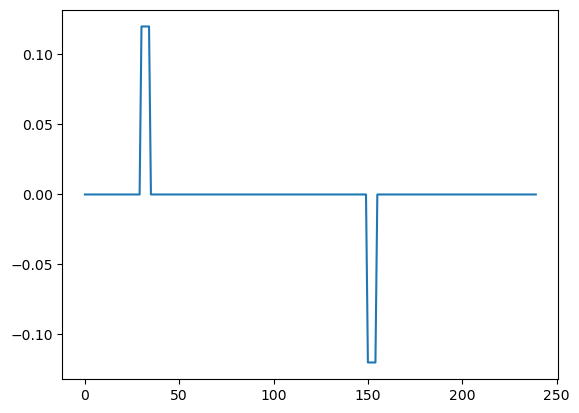

In [60]:
plt.plot(f["Stim"].ravel())

In [ ]:
switch contrastLevel
    case 1
        load('Data/JN05/flashesRGC_JN05/flash2001-04-06/Mtsp_long.mat')
    case 2
        load('Data/JN05/flashesRGC_JN05/flash2001-04-06b/Mtsp_long.mat')
    case 3
        load('Data/JN05/flashesRGC_JN05/flash2001-04-06c/Mtsp_long.mat')
    case 4
        load('Data/JN05/flashesRGC_JN05/flash2001-04-06d/Mtsp_long.mat')
end